In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['savefig.dpi'] = 300

import seaborn as sns

from tqdm.auto import tqdm

import time
import os
import json
import pickle

import gc

import sys
sys.path.append("../")

from src.visualization import plot_waveforms

idx = pd.IndexSlice

In [2]:
data = pd.read_csv("../misc/table_koivumaki_april_5.csv", index_col=[0, 1], header=[0, 1, 2] )

In [3]:
data.loc[('common', 'fitness')].sort_values()

Group  Cell  Case         
4      1     210331_083730   -0.215294
3      3     210401_045611   -0.199139
1      3     210330_225356   -0.193983
3      4     210404_140451   -0.186704
2      1     210331_202044   -0.181232
3      2     210401_032417   -0.178849
1      2     210331_001124   -0.175638
4      8     210405_151337   -0.173308
3      5     210331_034105   -0.172541
4      2     210331_072253   -0.164798
2      3     210331_224948   -0.160477
4      4     210331_060241   -0.150460
       6     210404_171701   -0.147217
       3     210331_045238   -0.139625
3      1     210401_015226   -0.134075
2      4     210401_002027   -0.129760
4      5     210404_154645   -0.127835
1      1     210404_122656   -0.125435
2      2     210331_013932   -0.125180
4      7     210404_203302   -0.123451
Name: (common, fitness), dtype: float64

In [14]:
df = data.T['common'].iloc[:, 1:-2].copy()
df = np.log10(df)
columns_labels = df.index.names
columns_scalers = df.columns

In [5]:
df_box = df.stack().reset_index()
df_box

,Group,Cell,Case,level_3,0
0,1,1,210404_122656,PNa,0.384718
1,1,1,210404_122656,gCaL,-0.578424
2,1,1,210404_122656,gt,-0.205000
3,1,1,210404_122656,gKur,-0.977328
4,1,1,210404_122656,gK1,0.159472
...,...,...,...,...,...
315,4,8,210405_151337,gIf,-0.659588
316,4,8,210405_151337,kNaCa,0.185795
317,4,8,210405_151337,Jrel_multiplier,-0.793196
318,4,8,210405_151337,cpumps,0.974822


['PNa', 'gCaL', 'gK1', 'INaKmax'] ['INa', 'ICaL', 'IK1', 'INaK']
['gt', 'gKur', 'gKr', 'gKs'] ['Ito', 'IKur', 'IKr', 'IKs']
['Jrel_multiplier', 'cpumps', 'kNaCa', 'ICaPmax'] ['Jrel', 'Jup', 'INCX', 'ICaP']


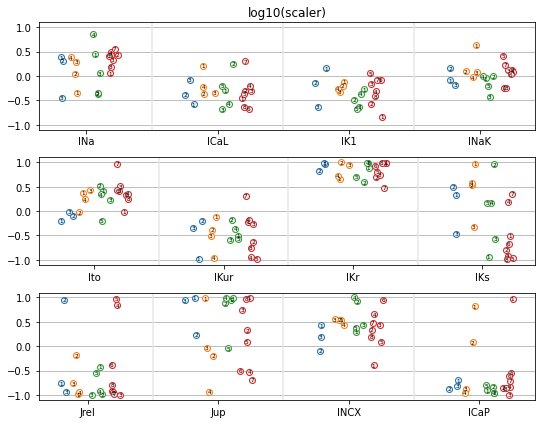

In [6]:
scalers_group_list = [['PNa', 'gCaL', 'gK1', 'INaKmax'],
                      ['gt', 'gKur', 'gKr', 'gKs'],
                      ['Jrel_multiplier', 'cpumps', 'kNaCa', 'ICaPmax']]

xtickslabels_list = [['INa', 'ICaL', 'IK1', 'INaK'],
                     ['Ito', 'IKur', 'IKr', 'IKs'],
                     ['Jrel', 'Jup', 'INCX', 'ICaP']]

fig, axes = plt.subplots(nrows=len(scalers_group_list), figsize=plt.figaspect(0.8)*1.5)

for scalers_group, xtickslabels, ax in zip(scalers_group_list, xtickslabels_list, axes):
    
#     sns.swarmplot(data=df_box[df_box.level_3.isin(scalers_group)],
#                   x='level_3', y=0, hue='Group', dodge=True, ax=ax, label=None)
    
    for i_scaler, scaler in enumerate(scalers_group):
        df_scaler = df_box[df_box.level_3 == scaler]
        for _, row in df_scaler.iterrows():
            ig, ic = row[['Group', 'Cell']].astype(int)
            y = row.iloc[-1]
            x = i_scaler + (ig - 2.5) / 7 + (np.random.random() - 0.5) / 10
            color = f'C{ig  - 1}'       
            
            ax.plot(x, y, 'o', color=color, alpha=1, markerfacecolor='w', ms=6)
            ax.plot(x, y, 'o', color=color, alpha=0.1, mew=None, ms=6)
            ax.text(x, y, str(ic), ha='center', fontsize='xx-small', va='center', color='k')
                
    for i in range(len(scalers_group) - 1):
        ax.axvline(i + 0.5, color='0.9')
    
    ax.set_ylim(-1.1, 1.1)
    ax.grid(axis='y')
    #ax.legend().set_visible(False)    
    ax.set_xlabel('')
    ax.set_ylabel("")
    ax.set_xticks(np.arange(len(scalers_group)))
    ax.set_xticklabels(xtickslabels)
    print(scalers_group, xtickslabels)
    
axes[0].set_title('log10(scaler)')

plt.tight_layout()

#plt.savefig("../images/voigt/coeffs_stripplot.png")

In [7]:
df = df.reset_index()
df

,Group,Cell,Case,PNa,gCaL,gt,gKur,gK1,gKr,gKs,gNab,gCab,INaKmax,ICaPmax,gIf,kNaCa,Jrel_multiplier,cpumps,kSRleak
0,1,1,210404_122656,0.384718,-0.578424,-0.205000,-0.977328,0.159472,0.975289,0.334487,0.270351,-0.274864,-0.086375,-0.699392,0.607430,0.427912,-0.764911,0.984532,-0.282877
1,1,2,210331_001124,0.311696,-0.384897,-0.096250,-0.206391,-0.134947,0.825937,0.497642,-0.982259,-0.145929,0.157939,-0.873752,-0.929113,-0.093410,0.948749,0.234950,-0.841573
2,1,3,210330_225356,-0.447802,-0.073669,-0.009762,-0.347783,-0.630948,0.983357,-0.459929,-0.393882,-0.575147,-0.178149,-0.816834,0.294077,0.193662,-0.934742,0.942585,-0.631230
3,2,1,210331_202044,-0.342593,0.208738,0.379503,-0.123092,-0.119183,0.655974,0.974089,-0.125529,-0.394034,0.627031,0.818146,-0.511572,0.544739,-0.989535,0.979671,0.654620
4,2,2,210331_013932,0.039665,-0.367261,-0.025500,-0.387456,-0.204857,0.997637,0.525634,0.267104,-0.688816,0.097240,0.080150,0.755094,0.546565,-0.187652,-0.201895,0.232333
5,2,3,210331_224948,0.285581,-0.341122,0.423637,-0.506394,-0.323337,0.944428,-0.318288,-0.395470,-0.401157,0.076765,-0.869604,-0.850618,0.550037,-0.765599,-0.040157,0.235705
6,2,4,210401_002027,0.380419,-0.219021,0.239128,-0.963861,-0.260674,0.725759,0.585067,0.109328,-0.568393,-0.028840,-0.952863,-0.113145,0.434190,-0.950082,-0.943468,-0.364120
7,3,1,210401_015226,0.446697,-0.295461,0.421103,-0.501821,-0.274644,0.883652,-0.944017,-0.430352,-0.379246,-0.046841,-0.906886,-0.965047,0.288255,-0.417258,0.954153,0.236890
8,3,2,210401_032417,-0.370887,0.250463,0.519325,-0.178011,-0.484283,0.592188,0.956761,-0.418447,-0.588900,-0.006752,-0.833759,-0.672792,0.921599,-0.990471,0.876886,0.985884
9,3,3,210401_045611,0.054868,-0.684370,0.233920,-0.591797,-0.637040,0.984501,-0.564047,-0.814617,-0.627962,-0.426651,-0.958304,-0.753767,0.433726,-0.995723,0.982862,0.970499


In [ ]:
columns_scalers_subset = ['PNa', 'gCaL', 'gK1', 'gt', 'gKur']

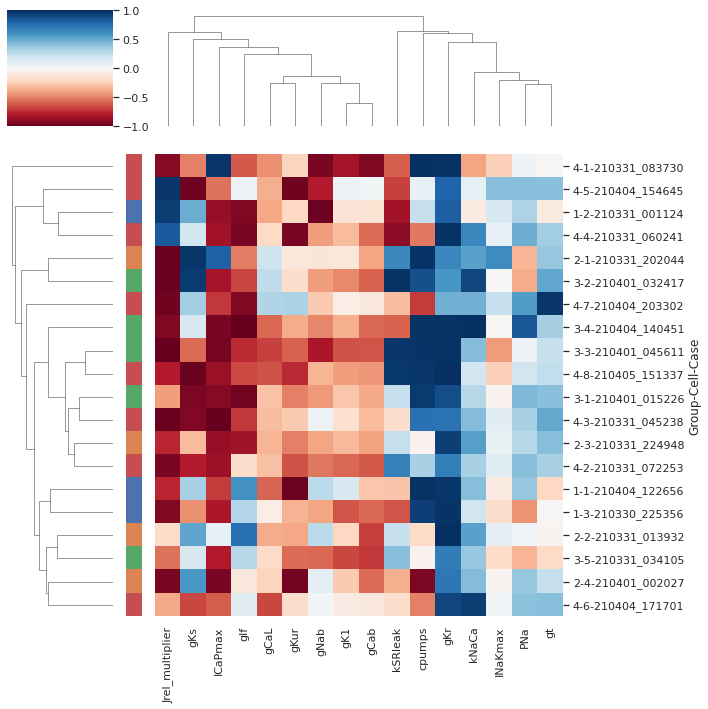

In [48]:
#fig, ax = plt.subplots(dpi=300)

g = sns.clustermap(df[columns_scalers_subset],
                   row_colors=[f'C{int(i) - 1}' for i in df.reset_index()['Group']],
                   cmap='RdBu', vmin=-1, vmax=1)

plt.tight_layout()

plt.savefig("../images/voigt/dendrograms.png", dpi=600)

In [139]:
columns_scalers_subset = ['PNa', 'gCaL', 'gK1', 'gt', 'gKur']

In [140]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=None)

X = df.loc[:, ~df.columns.isin(columns_labels) & df.columns.isin(columns_scalers_subset)].copy()
X = StandardScaler().fit_transform(X)

y = pca.fit_transform(X)

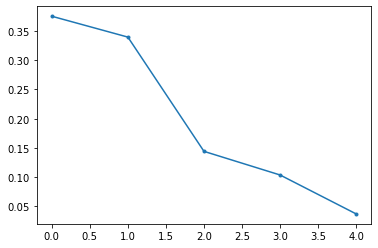

In [141]:
plt.plot(pca.explained_variance_ratio_, '.-')

In [142]:
df_pca = pd.DataFrame(y, columns=[f'pc{i}' for i in range(pca.n_components_)])
df_pca = pd.concat([df_pca, df[columns_labels]], axis=1)
df_pca

,pc0,pc1,pc2,pc3,pc4,Group,Cell,Case
0,-2.437255,-0.726551,1.710882,0.703307,-0.205141,1,1,210404_122656
1,-0.420586,-0.007833,0.324865,1.519465,-0.624436,1,2,210331_001124
2,0.722028,2.499554,0.321124,0.016651,-0.023305,1,3,210330_225356
3,2.280206,0.550518,1.382301,0.317240,0.299669,2,1,210331_202044
4,-0.387876,0.544039,0.579200,0.917683,-0.045389,2,2,210331_013932
5,0.041706,-0.425722,-0.289048,-0.298565,0.256931,2,3,210331_224948
6,-0.853002,-0.426213,0.647177,-1.065544,-0.354358,2,4,210401_002027
7,0.033628,-0.827643,-0.263735,-0.285662,-0.091830,3,1,210401_015226
8,2.549372,1.205400,0.401913,-0.636713,0.284847,3,2,210401_032417
9,-1.007157,0.960216,-1.121195,-0.215651,0.768500,3,3,210401_045611


<AxesSubplot:xlabel='pc0', ylabel='pc1'>

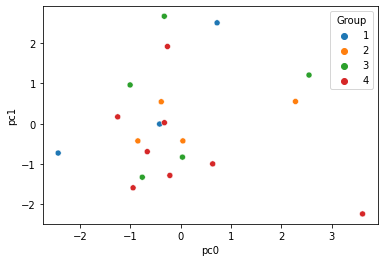

In [143]:
sns.scatterplot(data=df_pca, x='pc0', y='pc1', hue='Group')

  0%|          | 0/4 [00:00<?, ?it/s]

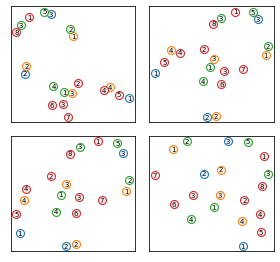

In [144]:
from sklearn.manifold import TSNE
import itertools

perplexity_list = [3, 4, 5, 8]#, 10, 15, 20]
learning_rate_list = [100] # [10, 50, 100, 500, 1000]

n = len(perplexity_list)
m = len(learning_rate_list)

#fig, axes = plt.subplots(nrows=n, ncols=m, figsize=plt.figaspect(n / m) * 2)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=plt.figaspect(1))

axes = axes.flatten().T

params = list(enumerate(itertools.product(perplexity_list, learning_rate_list)))

for i, pair in tqdm(params):
    
    #print(i, pair)
    perplexity, learning_rate = pair
    
    ax = axes[i]
            
    tsne = TSNE(n_components=2,
            random_state=42,
#             metric=(lambda x, y: js_divergence(x, y, squared=True)),
#             square_distances=True,
            perplexity=perplexity,
            learning_rate=learning_rate,
            init='pca')

    X_embedded = tsne.fit_transform(X)

    df_embedded = pd.DataFrame(X_embedded)
    for c in columns_labels:
        df_embedded[c] = df[c].values
    df_embedded.rename(columns={0: 'x', 1: 'y'}, inplace=True)

    # df_embedded
    
#     sns.scatterplot(data=df_embedded, x='x', y='y',
#                     hue='Group',
#                     #palette='tab20',
#                     #style=style,
#                     legend=False,
#                     #s=9,
#                     #alpha=0.75,
#                     ax=ax)
    
    for _, row in df_embedded.iterrows():
        x, y, ig, ic, *_ = row
        ig, ic = map(int, [ig, ic])
        color = f'C{ig - 1}'
        ax.plot(x, y, 'o', color=color, alpha=1, markerfacecolor='w', ms=8)
        ax.plot(x, y, 'o', color=color, alpha=0.1, mew=None, ms=8)
        
        ax.text(x, y, str(ic), ha='center', fontsize='x-small', va='center', color='k')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel("")
    ax.set_ylabel("")   
    
    if False:
    
        if i < m:
            ax.set_title(str(learning_rate))

        if i % m == 0:
            ax.set_ylabel(str(perplexity))
    
    #ax.set_title(str(i))

plt.tight_layout()
plt.subplots_adjust(top=0.9)

#fig.suptitle(f'Pages. Color = {hue}. Style = {style}')

#plt.savefig(f"../images/voigt/tsne_epsilon100.png", bbox_inches='tight')

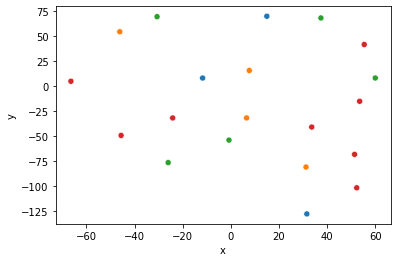

In [145]:
sns.scatterplot(data=df_embedded, x='x', y='y',
                hue='Group',
                #palette='tab20',
                #style=style,
                legend=False,
                #s=9,
                #alpha=0.75,
                )

plt.show()

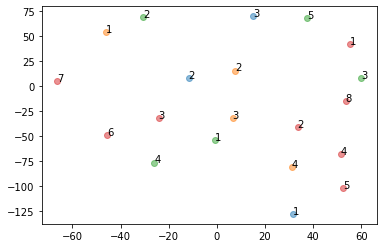

In [146]:
for i, row in df_embedded.iterrows():
    x, y, ig, ic, *_ = row
    ig, ic = map(int, [ig, ic])
    plt.plot(x, y, 'o', color=f'C{ig - 1}', alpha=0.5)
    plt.text(x, y, str(ic))

# Waveforms

### pca

In [5]:
df_pca = pd.read_csv("../misc/df_pca_voigt.csv", index_col=0)
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1_1,-17.651714,20.204994,-5.145035,-3.700161,-1.495155,-2.961818,-1.212279,0.688645,0.002762,0.697554,0.859045,-0.033087,-0.735821,-0.601218,0.085198,0.358955,0.460861,-0.006849,0.523207,8.211567e-15
1_2,-3.812646,7.391447,-7.863651,3.443833,0.620919,1.732348,1.002902,1.015504,0.394901,-1.684171,0.625116,-0.898638,0.693266,0.193347,-0.113348,-0.520778,0.573959,-0.509206,0.096735,8.211567e-15
1_3,3.213475,11.475128,-3.118977,0.191104,1.629988,4.292563,1.296183,-0.880569,0.310113,0.929842,0.341865,1.793547,-0.378735,0.332520,0.101209,0.495129,-0.041386,-0.142000,-0.054195,8.211567e-15
2_1,7.153054,19.230364,5.356555,5.649623,-0.441443,-2.386903,0.596026,-2.747485,-0.618732,-0.238235,-0.383929,-0.020186,0.179456,-0.149292,-0.316438,-0.208108,0.335317,-0.022131,0.054258,8.211567e-15
2_2,-4.015766,6.350241,-0.158249,-2.410365,-2.995924,2.254666,0.442701,-0.320788,-0.135855,0.433230,-0.094232,-1.301961,0.312596,0.749172,-0.792202,0.165646,-0.542928,1.289702,0.157862,8.211567e-15
2_3,0.850530,-8.675048,4.417872,0.565774,-2.134522,0.173104,-1.760376,-1.097260,0.547742,-0.492343,1.768165,-0.174470,0.014961,1.166156,0.855068,0.430847,-0.005001,-0.329693,0.031098,8.211567e-15
2_4,12.414855,-2.552497,-1.164132,0.082399,-0.880736,1.209642,0.020077,-0.232832,-0.795345,-0.905203,-0.776493,-0.916650,-0.700672,-0.925780,0.223938,1.481568,-0.488640,-0.550527,-0.383893,8.211567e-15
3_1,-2.288155,-3.710967,0.581287,-2.063437,-0.532807,1.092795,1.246305,-0.286770,-1.131755,0.330309,-0.375622,-0.435644,-0.358743,-0.342275,1.754375,-0.965343,0.390258,0.425518,0.042684,8.211567e-15
3_2,17.384638,-13.792394,-2.964697,6.071424,-2.303803,-0.291138,-0.220809,0.997294,-1.126614,1.883080,0.838486,-0.018601,0.092112,-0.373072,-0.421906,-0.295639,-0.192567,-0.199608,-0.149198,8.211567e-15
3_3,-13.651120,-7.857739,-3.954874,3.077119,2.315199,-0.366100,-1.984276,0.148683,-0.849107,-0.475055,-1.413035,0.397478,-1.001576,1.086960,-0.130377,-0.121484,-0.005113,0.260755,0.531291,8.211567e-15


In [6]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2,
        random_state=42,
#             metric=(lambda x, y: js_divergence(x, y, squared=True)),
#             square_distances=True,
        perplexity=2,
        #learning_rate=learning_rate,
        #init='pca',
           )

X_embedded = tsne.fit_transform(df_pca)

df_embedded = pd.DataFrame(X_embedded)
#for c in columns_labels:
#    df_embedded[c] = df[c].values
df_embedded.rename(columns={0: 'x', 1: 'y'}, inplace=True)

In [29]:
df_embedded['g'] = [int(x.split("_")[0]) - 1 for x in df_pca.index]
df_embedded['g'] = df_embedded['g'].astype('category')

<AxesSubplot:xlabel='x', ylabel='y'>

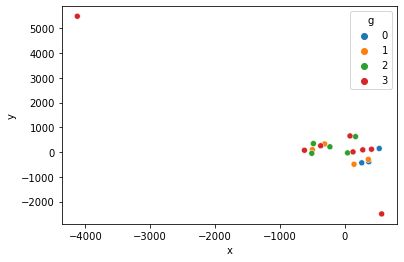

In [30]:
sns.scatterplot(data=df_embedded, x='x', y='y', hue='g')

  0%|          | 0/20 [00:00<?, ?it/s]

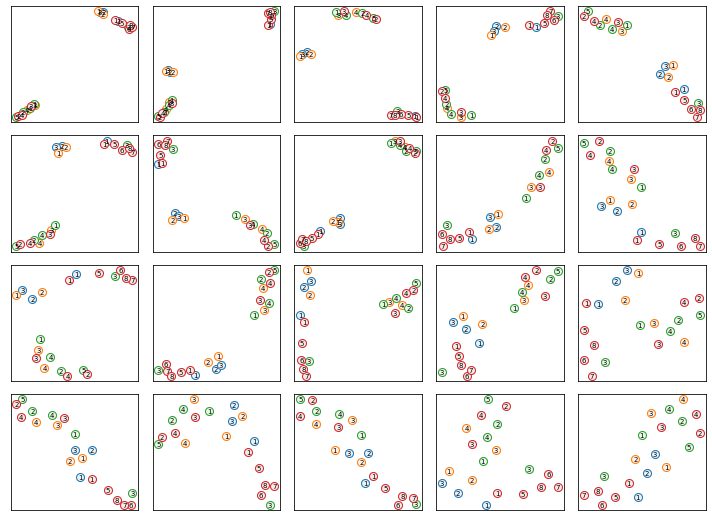

In [47]:
from sklearn.manifold import TSNE
import itertools

perplexity_list = [3, 4, 5, 8]#, 10, 15, 20]
learning_rate_list = [10, 50, 100, 500, 1000]

n = len(perplexity_list)
m = len(learning_rate_list)

fig, axes = plt.subplots(nrows=n, ncols=m, figsize=plt.figaspect(n / m) * 2)

#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=plt.figaspect(1))

axes = axes.flatten().T

params = list(enumerate(itertools.product(perplexity_list, learning_rate_list)))

for i, pair in tqdm(params):
    
    #print(i, pair)
    perplexity, learning_rate = pair
    
    ax = axes[i]
            
    tsne = TSNE(n_components=2,
            random_state=42,
#             metric=(lambda x, y: js_divergence(x, y, squared=True)),
#             square_distances=True,
            perplexity=perplexity,
            learning_rate=learning_rate,
            #init='pca',
               )

    #X_embedded = tsne.fit_transform(df_pca)
    X_embedded = umap.UMAP(n_neighbors=perplexity,
                           min_dist=learning_rate/2000,).fit_transform(df_pca)

    df_embedded = pd.DataFrame(X_embedded)
#     for c in columns_labels:
#         df_embedded[c] = df[c].values
    df_embedded.rename(columns={0: 'x', 1: 'y'}, inplace=True)
    
    df_embedded['g'] = [int(x.split("_")[0]) for x in df_pca.index]
    df_embedded['g'] = df_embedded['g'].astype('category')
    
    df_embedded['c'] = [int(x.split("_")[1]) for x in df_pca.index]
    df_embedded['c'] = df_embedded['c'].astype('category')
    
    # df_embedded
    
#     sns.scatterplot(data=df_embedded, x='x', y='y',
#                     hue='Group',
#                     #palette='tab20',
#                     #style=style,
#                     legend=False,
#                     #s=9,
#                     #alpha=0.75,
#                     ax=ax)
    
    for _, row in df_embedded.iterrows():
        x, y, ig, ic, *_ = row
        ig, ic = map(int, [ig, ic])
        color = f'C{ig - 1}'
        ax.plot(x, y, 'o', color=color, alpha=1, markerfacecolor='w', ms=8)
        ax.plot(x, y, 'o', color=color, alpha=0.1, mew=None, ms=8)
        
        ax.text(x, y, str(ic), ha='center', fontsize='x-small', va='center', color='k')
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.set_xlabel("")
    ax.set_ylabel("")   
    
    if False:
    
        if i < m:
            ax.set_title(str(learning_rate))

        if i % m == 0:
            ax.set_ylabel(str(perplexity))
    
    #ax.set_title(str(i))

plt.tight_layout()
plt.subplots_adjust(top=0.9)

#fig.suptitle(f'Pages. Color = {hue}. Style = {style}')

#plt.savefig(f"../images/voigt/tsne_epsilon100.png", bbox_inches='tight')

In [36]:
import umap
from sklearn.datasets import load_digits

digits = load_digits()

embedding = umap.UMAP().fit_transform(digits.data)

In [43]:
embedding = umap.UMAP().fit_transform(df_pca)

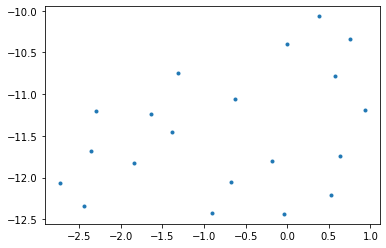

In [46]:
plt.plot(embedding[:, 0], embedding[:, 1], '.')

### native

In [215]:
data = pd.read_csv("../data/voigt/all.csv")

data = data[data.CL == 516]

columns_labels = ['Group', 'Cell']
columns_values = ['V'] # ['V', 'CaT']
# columns_values = ['CaT']

data[columns_labels] = data[columns_labels].astype('category')
data = data[columns_labels + columns_values]

In [216]:
# data.groupby(['Group', 'Cell', 'CL']).apply(len).value_counts()

In [217]:
from src.helpers import autoscaling

In [218]:
rescale = lambda x: (x - x.min()) / x.ptp()

In [219]:
df_labels = data[columns_labels].drop_duplicates()

sample_list = []

for i_row, row in df_labels.iterrows():
    
    mask = np.ones(len(data)).astype(bool)
    for key, value in row.items():
        mask &= data[key] == value
        
    sample = data[mask][columns_values].values.flatten()
    sample = rescale(sample)
        
    sample_list.append(sample)
    
    print(len(sample))

506
506
506
506
506
506
506
506
506
506
506
506
506
506
506
506
506
506
506
506


In [220]:
samples = np.array(sample_list)

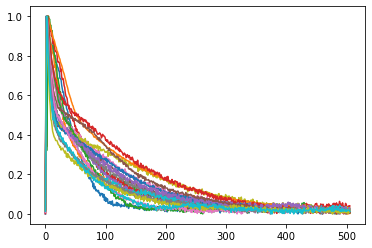

In [221]:
plt.plot(samples.T)

In [222]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=None)

X = samples.copy()
#X = StandardScaler().fit_transform(X)

y = pca.fit_transform(X)

In [223]:
df_pca = pd.concat([pd.DataFrame(y), df_labels.reset_index(drop=True)], axis=1)

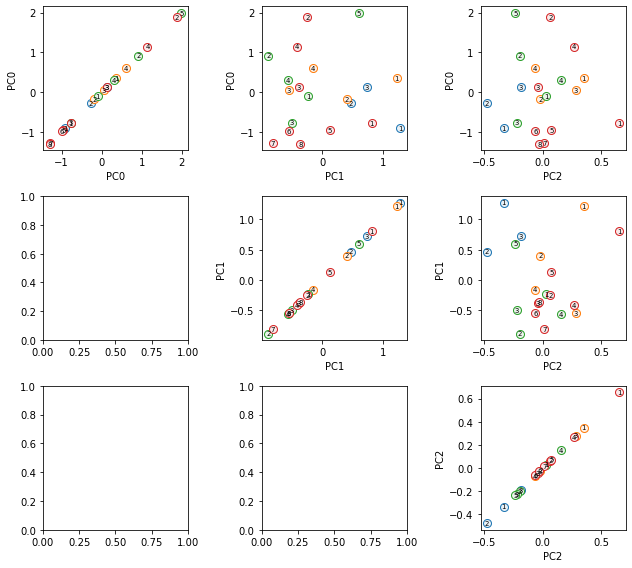

In [224]:
fig, axes = plt.subplots(3, 3, figsize=plt.figaspect(0.9) * 2)

for i_row in range(3):
    for i_col in range(i_row, 3):
        ax = axes[i_row, i_col]

        for _, row in df_pca[[i_col, i_row, 'Group', 'Cell']].iterrows():
            x, y =  row[:2]
            ig, ic = row[['Group', 'Cell']].astype(int)
            color = f'C{ig - 1}'
            ax.plot(x, y, 'o', color=color, alpha=1, markerfacecolor='w', ms=8)
            ax.plot(x, y, 'o', color=color, alpha=0.1, mew=None, ms=8)

            ax.text(x, y, str(ic), ha='center', fontsize='x-small', va='center', color='k')
            
            #ax.set_xticks([])
            #ax.set_yticks([])
            
            ax.set_xlabel(f'PC{i_col}')
            ax.set_ylabel(f'PC{i_row}')
            
plt.tight_layout()

In [170]:
df_pca_ca = df_pca.copy()
df_pca_ca.columns = [f'ca{i}' for i in range(20)] + columns_labels
df_pca_ca

,ca0,ca1,ca2,ca3,ca4,ca5,ca6,ca7,ca8,ca9,...,ca12,ca13,ca14,ca15,ca16,ca17,ca18,ca19,Group,Cell
0,-1.875964,-7.428340,-1.638801,0.107889,0.432417,-1.991036,-2.748459,0.013083,-1.264330,-1.400473,...,-0.070661,0.103557,-0.460092,-0.258020,-0.297483,-0.006993,-0.040492,4.182747e-15,1,1
1,-6.732827,2.251627,5.441015,-0.093766,1.498858,-0.601666,-0.398798,0.832769,1.455726,-0.005999,...,-1.742785,-0.541952,0.105298,0.002446,-0.104022,-0.073204,0.007816,4.182747e-15,1,2
2,-1.889450,-3.411327,2.313413,-1.860720,-2.621019,3.295587,-1.003777,0.242653,-0.936515,0.765360,...,-0.014398,-0.049743,0.184930,-0.611323,0.060845,-0.276369,-0.056505,4.182747e-15,1,3
3,6.195728,-1.650065,-0.152741,0.494149,0.404473,-0.547177,0.096170,0.521691,-0.111851,0.290912,...,-0.276677,0.223764,0.088050,0.086252,2.291482,-0.108038,-0.065263,4.182747e-15,2,1
4,1.095000,0.160311,2.423167,-0.567524,0.566362,0.067275,-0.052235,0.336740,-0.008275,0.363219,...,1.152867,0.873283,-0.365270,2.155127,-0.359940,-0.250969,-0.007723,4.182747e-15,2,2
5,-0.841327,8.023963,-3.868787,-0.559808,-0.964568,0.871330,0.143019,-1.601520,-0.196136,-2.057249,...,-0.577342,-0.019377,0.453297,0.437986,0.144922,0.013427,0.026644,4.182747e-15,2,3
6,-3.854364,5.093845,-5.021568,0.692445,-1.056803,-0.162992,-0.940500,2.973426,1.175741,0.823230,...,0.482259,-0.161341,-0.244550,-0.129416,-0.054408,-0.034050,0.001392,4.182747e-15,2,4
7,0.028204,0.074344,-1.113972,-1.578182,0.546244,-0.129232,-0.033511,0.632930,0.054888,-0.539842,...,0.207046,0.378212,-0.567612,-0.301662,-0.065048,0.053582,-0.012180,4.182747e-15,3,1
8,2.798869,-3.884957,-0.738985,0.499566,-0.011897,-0.403473,-0.163114,0.299056,0.763748,0.007838,...,0.154703,0.083192,2.688772,0.200749,-0.422498,0.022563,-0.038913,4.182747e-15,3,2
9,-5.238734,-4.082843,-2.945337,1.789011,3.436099,2.573719,1.573368,0.207413,-0.704263,-0.074417,...,0.042211,-0.097448,-0.117155,-0.118254,-0.079965,-0.015572,0.002284,4.182747e-15,3,3


In [187]:
df_pca_v = df_pca.copy()
df_pca_v.columns = [f'v{i}' for i in range(20)] + columns_labels
df_pca_v

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v12,v13,v14,v15,v16,v17,v18,v19,Group,Cell
0,-3.445792,2.955474,-2.562597,0.717119,1.985117,-1.276963,-0.027912,0.152849,-0.083520,0.026244,...,-0.371709,-0.386752,0.320244,-0.163220,0.071215,0.041144,0.084851,2.371503e-15,1,1
1,-0.530110,1.025358,-2.013376,-0.650984,-0.081770,-0.011819,0.180618,1.042102,0.750419,0.641678,...,0.461476,-0.058451,-0.242957,0.374904,0.197915,0.089095,-0.164785,2.371503e-15,1,2
2,0.351704,0.749322,-1.606844,-2.244425,-1.244599,-0.409542,-0.570165,0.000572,-0.476365,-0.298803,...,0.262276,0.675228,0.413798,-0.125562,0.190722,-0.007614,-0.025351,2.371503e-15,1,3
3,3.352424,4.260028,1.501558,-0.274146,0.531835,-0.148992,-0.509962,0.196257,-0.432217,-0.873988,...,0.251881,-0.166693,-0.298564,0.089258,0.008540,-0.168090,-0.030933,2.371503e-15,2,1
4,5.014957,3.252333,1.867708,0.938860,-1.053626,0.026219,-0.257297,0.031179,0.077716,1.075093,...,-0.380227,0.196483,0.176629,0.010558,-0.162425,0.163882,0.082616,2.371503e-15,2,2
5,0.906903,-1.547701,0.149155,2.208986,-0.224423,0.160602,-0.060442,0.164195,0.364508,-0.352916,...,0.005649,0.169671,-0.199551,-0.303022,0.469658,0.345803,0.178990,2.371503e-15,2,3
6,2.120930,-0.862837,0.581115,0.677367,1.800702,-0.240287,0.698480,0.343230,-0.238114,0.143414,...,0.664233,0.116456,-0.086912,-0.403261,-0.298598,-0.047691,0.036892,2.371503e-15,2,4
7,-1.545239,-0.489337,0.016588,0.248730,1.504130,0.304725,0.024189,-0.409846,-0.003697,-0.031491,...,-0.019485,0.373432,-0.116974,0.469358,-0.020429,-0.131153,0.485658,2.371503e-15,3,1
8,2.458685,-2.849851,0.828987,-1.035314,0.555696,0.807683,0.367102,1.468304,-0.486008,-0.066918,...,-0.442155,-0.172017,0.217627,0.032503,0.048089,-0.101500,0.020164,2.371503e-15,3,2
9,-2.758568,-1.655885,0.613230,-1.314900,-0.895175,-0.655202,-0.534813,0.244579,-0.510317,-0.370309,...,-0.100339,-0.181395,-0.122627,0.138172,-0.318981,0.434804,0.074360,2.371503e-15,3,3


In [188]:
df_pca_concat = pd.concat([df_pca_v.iloc[:, :20], df_pca_ca], axis=1)
df_pca_concat

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,ca12,ca13,ca14,ca15,ca16,ca17,ca18,ca19,Group,Cell
0,-3.445792,2.955474,-2.562597,0.717119,1.985117,-1.276963,-0.027912,0.152849,-0.083520,0.026244,...,-0.070661,0.103557,-0.460092,-0.258020,-0.297483,-0.006993,-0.040492,4.182747e-15,1,1
1,-0.530110,1.025358,-2.013376,-0.650984,-0.081770,-0.011819,0.180618,1.042102,0.750419,0.641678,...,-1.742785,-0.541952,0.105298,0.002446,-0.104022,-0.073204,0.007816,4.182747e-15,1,2
2,0.351704,0.749322,-1.606844,-2.244425,-1.244599,-0.409542,-0.570165,0.000572,-0.476365,-0.298803,...,-0.014398,-0.049743,0.184930,-0.611323,0.060845,-0.276369,-0.056505,4.182747e-15,1,3
3,3.352424,4.260028,1.501558,-0.274146,0.531835,-0.148992,-0.509962,0.196257,-0.432217,-0.873988,...,-0.276677,0.223764,0.088050,0.086252,2.291482,-0.108038,-0.065263,4.182747e-15,2,1
4,5.014957,3.252333,1.867708,0.938860,-1.053626,0.026219,-0.257297,0.031179,0.077716,1.075093,...,1.152867,0.873283,-0.365270,2.155127,-0.359940,-0.250969,-0.007723,4.182747e-15,2,2
5,0.906903,-1.547701,0.149155,2.208986,-0.224423,0.160602,-0.060442,0.164195,0.364508,-0.352916,...,-0.577342,-0.019377,0.453297,0.437986,0.144922,0.013427,0.026644,4.182747e-15,2,3
6,2.120930,-0.862837,0.581115,0.677367,1.800702,-0.240287,0.698480,0.343230,-0.238114,0.143414,...,0.482259,-0.161341,-0.244550,-0.129416,-0.054408,-0.034050,0.001392,4.182747e-15,2,4
7,-1.545239,-0.489337,0.016588,0.248730,1.504130,0.304725,0.024189,-0.409846,-0.003697,-0.031491,...,0.207046,0.378212,-0.567612,-0.301662,-0.065048,0.053582,-0.012180,4.182747e-15,3,1
8,2.458685,-2.849851,0.828987,-1.035314,0.555696,0.807683,0.367102,1.468304,-0.486008,-0.066918,...,0.154703,0.083192,2.688772,0.200749,-0.422498,0.022563,-0.038913,4.182747e-15,3,2
9,-2.758568,-1.655885,0.613230,-1.314900,-0.895175,-0.655202,-0.534813,0.244579,-0.510317,-0.370309,...,0.042211,-0.097448,-0.117155,-0.118254,-0.079965,-0.015572,0.002284,4.182747e-15,3,3


Text(0, 0.5, 'CaT')

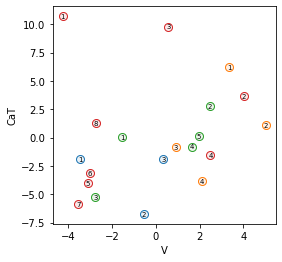

In [189]:
i_col = 'v0'
i_row = 'ca0'

fig, ax = plt.subplots(figsize=plt.figaspect(1))

for _, row in df_pca_concat[[i_col, i_row, 'Group', 'Cell']].iterrows():
    x, y =  row[:2]
    ig, ic = row[['Group', 'Cell']].astype(int)
    color = f'C{ig - 1}'
    ax.plot(x, y, 'o', color=color, alpha=1, markerfacecolor='w', ms=8)
    ax.plot(x, y, 'o', color=color, alpha=0.1, mew=None, ms=8)

    ax.text(x, y, str(ic), ha='center', fontsize='x-small', va='center', color='k')
    
plt.xlabel('V')
plt.ylabel('CaT')

In [200]:
from sklearn.metrics import pairwise_distances

In [225]:
m = pairwise_distances(samples)

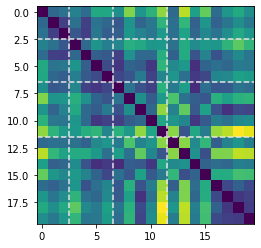

In [230]:
plt.imshow(m)

group_sizes = np.array([3, 4, 5])
indices = np.cumsum(group_sizes) - 0.5

for i in indices:
    plt.axhline(i, color='0.9', ls='--')
    plt.axvline(i, color='0.9', ls='--')

In [227]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, distance_sort='ascending', **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.

/home/andrey/WORK/HPL/Code/conda_env/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/andrey/WORK/HPL/Code/conda_env/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/andrey/WORK/HPL/Code/conda_env/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


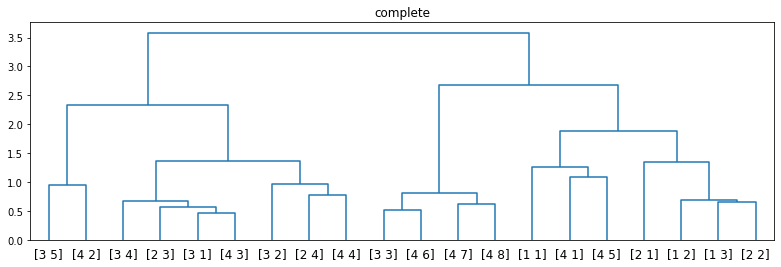

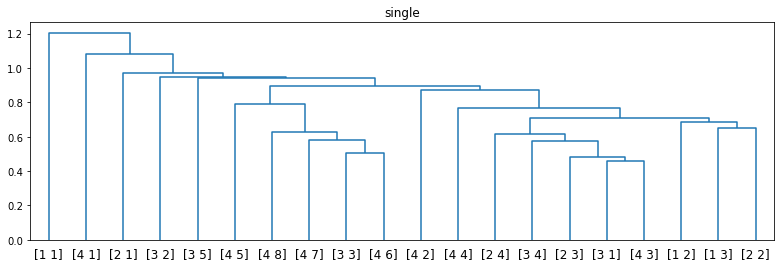

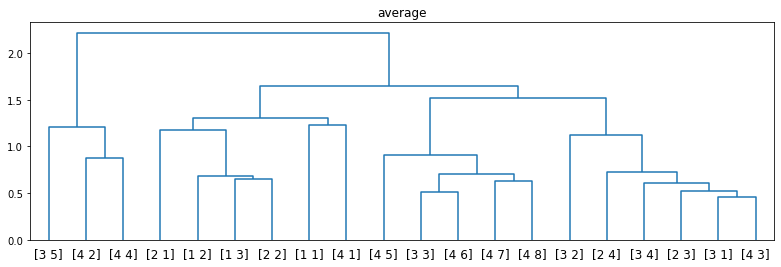

In [228]:
for aff in 'complete', 'single', 'average':

    model = AgglomerativeClustering(distance_threshold=0,
                                    n_clusters=None,
                                    affinity='precomputed',
                                    linkage=aff,
                                    )
    model = model.fit(m)

    plt.figure(figsize=plt.figaspect(0.3))
    plt.title(aff)
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode=None, color_threshold=0, #orientation='right',
                    labels=df_labels.values)
    #plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    #plt.setp(plt.gca().get_xticklabels(), rotation=90) # , ha='right'

#         plt.savefig(f"../images/publication/dendrograms/dendrogram_{aff}_{key}.png",
#                     dpi=300, facecolor='white', bbox_inches='tight')
    #plt.show()